# Project: Handwritten Digit Recognition (MNIST Dataset)

A project where you build a model to recognize handwritten digits (0–9) using the MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check dataset shape
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8663 - loss: 0.4708 - val_accuracy: 0.9544 - val_loss: 0.1551
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9610 - loss: 0.1346 - val_accuracy: 0.9671 - val_loss: 0.1095
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9744 - loss: 0.0854 - val_accuracy: 0.9717 - val_loss: 0.0970
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9698 - val_loss: 0.0979
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9868 - loss: 0.0473 - val_accuracy: 0.9747 - val_loss: 0.0858


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.0973
Test Accuracy: 97.34%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


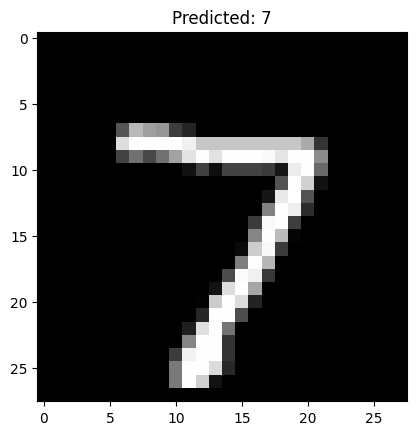

In [7]:
predictions = model.predict(test_images)

# Display a test image and its prediction
plt.figure()
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()